In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'

import numpy as np
from PIL import Image, ImageDraw
import os
import cv2
import time

from face_detector import FaceDetector

In [3]:
MODEL_PATH = 'models/model.pb'
face_detector = FaceDetector(MODEL_PATH, gpu_memory_fraction=0.25, visible_device_list='0')

# Get an image

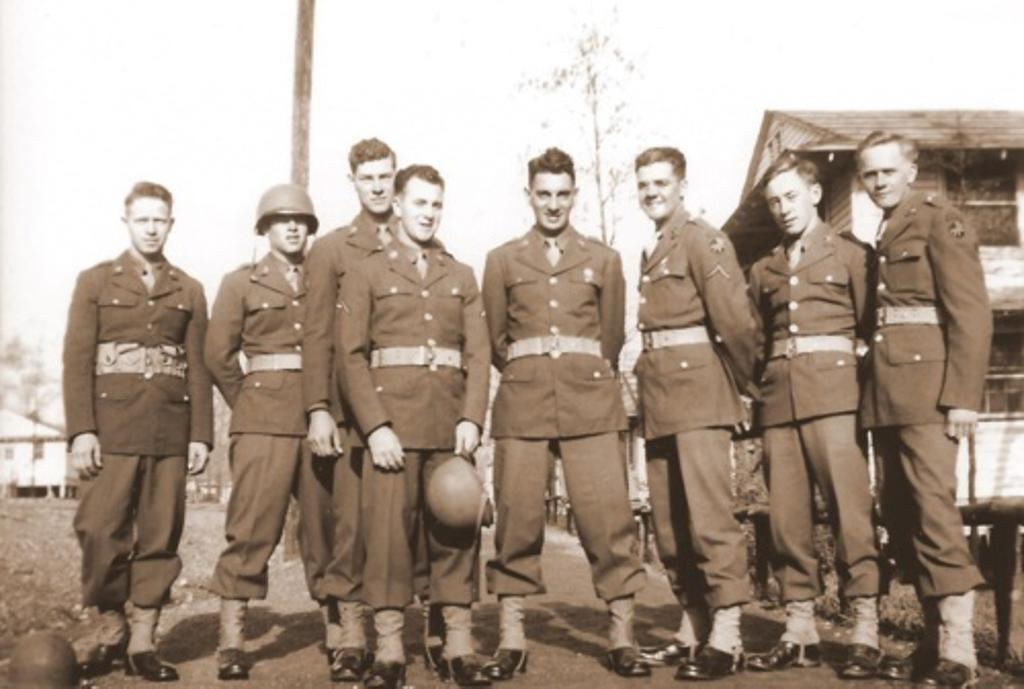

In [4]:
path = '~/datasets/widerface/WIDER_train/images/48--Parachutist_Paratrooper/48_Parachutist_Paratrooper_Parachutist_Paratrooper_48_972.jpg'
path = os.path.expanduser(path)
image_array = cv2.imread(path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_array)
image

# Show detections

In [5]:
def draw_boxes_on_image(image, boxes, scores):

    image_copy = image.copy()
    draw = ImageDraw.Draw(image_copy, 'RGBA')
    width, height = image.size

    for b, s in zip(boxes, scores):
        ymin, xmin, ymax, xmax = b
        fill = (255, 0, 0, 45)
        outline = 'red'
        draw.rectangle(
            [(xmin, ymin), (xmax, ymax)],
            fill=fill, outline=outline
        )
        draw.text((xmin, ymin), text='{:.3f}'.format(s))
    return image_copy

[[201.25693 127.24672 254.44652 169.93477]
 [159.26752 357.00073 209.95557 396.20203]
 [173.82521 532.3146  228.1556  572.4481 ]
 [182.73885 406.05988 233.05779 445.14142]
 [164.22166 635.1876  221.41808 677.0377 ]
 [150.08376 861.6062  208.45985 909.0835 ]
 [170.82428 763.8976  233.61623 811.60754]
 [207.20815 269.155   254.59424 308.60336]]


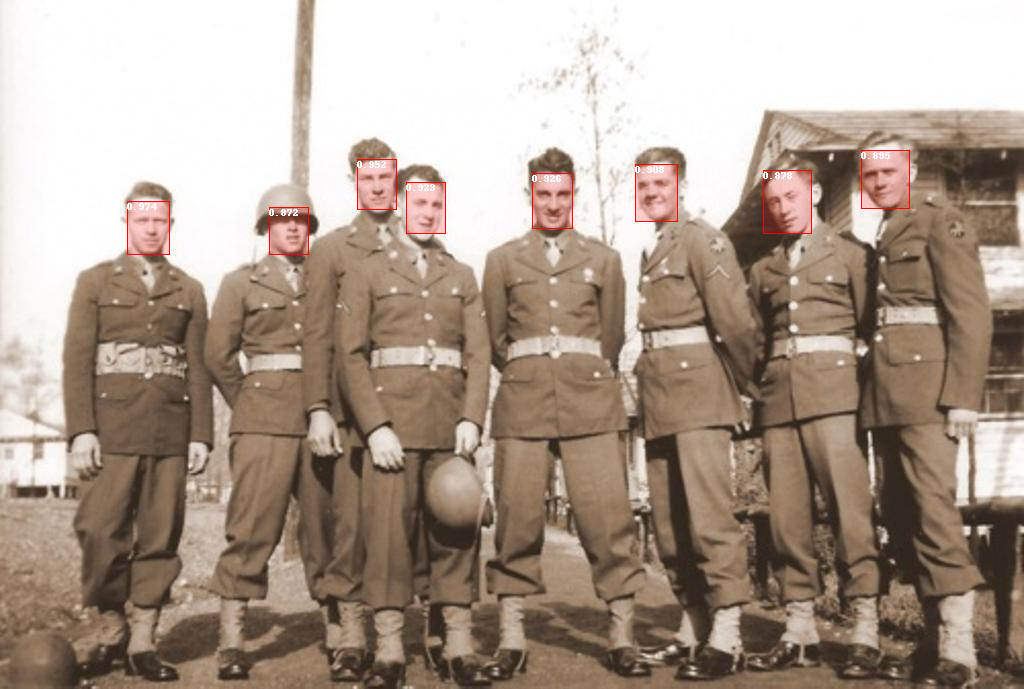

In [6]:
boxes, scores = face_detector(image_array, score_threshold=0.3)
print(boxes)
draw_boxes_on_image(Image.fromarray(image_array), boxes, scores)

# Measure speed

In [7]:
times = []
for _ in range(110):
    start = time.perf_counter()
    boxes, scores = face_detector(image_array, score_threshold=0.25)
    times.append(time.perf_counter() - start)
    
times = np.array(times)
times = times[10:]
print(times.mean(), times.std())

AttributeError: 'module' object has no attribute 'perf_counter'